## Em maio de 2018 tivemos a greve dos caminhoneiros no Brasil e as ações da Petrobras caíram bastante, de aproximadamente 25,00 para 14,00! Com base nisso, a ideia desta tarefa é verificar o comportamento da rede LSTM com essa grande variação no preço das ações. Siga as seguintes dicas:

## Você pode utilizar as ações de janeiro de 2013 até 25/05/2018 como base de dados de treinamento (dias antes da greve)
## Como base de treinamento, você pode utilizar os valores de 28/05/2018 até 22/06/2018

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflo

In [2]:
base = pd.read_csv('petr4_treinamento_ex.csv')
base = base.dropna()
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [3]:
base_treinamento = base.iloc[:, 1:2].values

In [4]:
base_treinamento[0]

array([19.99])

In [5]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [6]:
base_treinamento_normalizada.shape

(1342, 1)

In [7]:
previsores = []
preco_real = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])


# converter para array e necessario para passar os dados como parametros para a rede neural    
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [8]:
previsores.shape

(1152, 90)

In [9]:
preco_real.shape

(1152,)

In [10]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape =(previsores.shape[1], 1) ))
regressor.add(Dropout(0.3))



regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))


regressor.add(Dense(units = 1, activation = 'linear'))

W0905 14:39:21.067620 140602433836864 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 14:39:21.096493 140602433836864 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 14:39:21.099447 140602433836864 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 14:39:21.323999 140602433836864 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_w

In [12]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                         metrics = ['mean_absolute_error'])

W0905 14:39:21.996323 140602433836864 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
regressor.fit(previsores, preco_real, epochs =100, batch_size = 32 )

W0905 14:39:22.372936 140602433836864 deprecation.py:323] From /home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 14:39:24.825484 140602433836864 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1152/1152 [==============================] - 15s 13ms/step - loss: 0.0345 - mean_absolute_error: 0.1273
Epoch 2/100
1152/1152 [==============================] - 10s 9ms/step - loss: 0.0153 - mean_absolute_error: 0.0977
Epoch 3/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0790
Epoch 4/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0704
Epoch 5/100
1152/1152 [==============================] - 20s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0705
Epoch 6/100
1152/1152 [==============================] - 10s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0665
Epoch 7/100
1152/1152 [==============================] - 10s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0595
Epoch 8/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0596
Epoch 9/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.00

# Previsão dos preços das ações

In [14]:
base_teste = pd.read_csv('petr4_teste_ex.csv')

#extraindo a coluna 'open'
preco_real_teste = base_teste.iloc[:, 1:2].values

## Não vamos poder submeter os dados pra rede neural da maneira que extraimos na célula acima, pois o modelo foi treinado utilizando 90 preços anteriores. Então vamos precisar dos 90 preços anteriores de cada data que contém na coluna 'Open' dos dados de teste, que é referente ao mês de janeiro.

## Vamos precisar fazer codificação  para pegar os 90 preços anteriores de cada uma das ações da coluna em questão.

In [15]:
# Soma da coluna 'Open' de toda a base original com a base de teste, tudo na mesma coluna.
# Preciso de concatenação para que consiga fazer a extração dos 90 preços anteriores para cada prço dos dados de teste.

base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
base_completa

0     19.990000
1     19.809999
2     20.330000
3     20.480000
4     20.110001
        ...    
14    14.770000
15    14.260000
16    15.840000
17    16.090000
18    15.410000
Name: Open, Length: 1361, dtype: float64

In [16]:
# A conta seria de 1264 que são todas as linhas da base completa - 22 da base de teste, referentes aos preços
# de um mês e - 90, para determinar a partir de qual linha da base_completa deve-se pegar para ter os 90
# previsores da base de dados de teste.
# 1264 - 22 - 90 = 1152
# Ou seja, vou começar a buscar os registros a partir da posição 1152 para ter os 90 preditores de todos
# os dados de teste do mês de janeiro

entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [17]:
# Logo terei 112 registros, pois ele pega da posição 1152 até a posição 1264, que é a ultima posição.

entradas.shape

(109,)

In [18]:
# Colocamos -1 pois nao irei trabalhar com as linhas 
# E 1 para termos uma coluna 
# para ficar no formato numpy

# Usar .reshape(-1,1) se os seus dados tem uma única feature/coluna
# Ou usar .reshape(1,-1) se os seu dados tiverem uma unica linha/registro/amostra

entradas = entradas.reshape(-1, 1)
entradas.shape

(109, 1)

In [19]:
# Colocando os dados na mesma escala
# Aqui não chamamos o método '.fit_transform', pq ele vai normalizar as entradas de acordo com o que ja foi
# normalizado lá na 'base_treinamento_normalizada'.

entradas = normalizador.transform(entradas)

In [24]:
# Na variavel 'entradas' pegou-se 112 valores, e no for a cada iteração pega um range de 90 valores e coloca em cada coluna
# primeiro de '0 á 89', '1 á 90' e assim por diante. Até valores de '22 á 112'.
# Pegando 22 ranges de 90 valores
# há 22 linas de 90 valores de ações, onde cada valor é o 'open' de um dia em sequência
X_test = []

for i in range(90,109):
    X_test.append(entradas[i-90:i, 0])
    

X_test = np.array(X_test)



In [25]:
len(X_test.shape)

2

In [26]:
# Convertendo para formato do input_shape do RNN

# previsores.shape[0] = 22, número de registros
# previsores.shape[1] = 90, colunas, preço da ação na unidade de tempo, no caso em 90 unidades de tempo
# 1 = apenas referente a coluna 'open', um indicador. Com base nos dados da coluna open no passado quero prever os dados da coluna open no futuro.

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
previsoes = regressor.predict(X_test)

# 'Desnormalizando' para visualizar os resultados das previsoes dos preços efetivamente
previsoes = normalizador.inverse_transform(previsoes)

In [28]:
previsoes.mean()


16.801975

In [29]:
preco_real_teste.mean()

16.379473684210524

In [30]:
Diferença_do_preço_da_ação_na_média = 17.87454563636364 - 17.214916
Diferença_do_preço_da_ação_na_média

0.6596296363636398

 # Gráfico com o Preço das AÇões

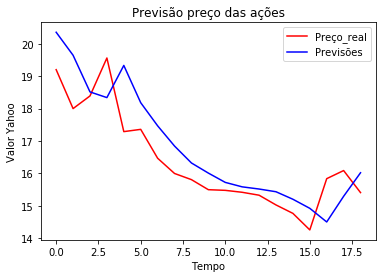

In [31]:
plt.plot(preco_real_teste, color='red', label='Preço_real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()

# Pode usar essa tarefa para fazer uma análise de tendência, caso seja um investidor a longo prazo pode rodar esse código para 10 anos atrás e verificar se é uma ação que tem tendência a subir ou não.

# Então através de um gráfico, analisando o passado, pode-se fazer uma previsão de como que o valor da ação irá ficar daqui 2, 3 anos.

# Não é somente para prever o preço exato da ação, pode prever também a tendência, usado com analise de tendência.